In [1]:
import numpy as np, matplotlib.pyplot as plt, json

## Experiment 1

- $N = 10$
- $C \in [0; 100[$
- $M \in \{0; 1\}$
- Global planner config:
    - `UAV_THICKNESS = 0.5`
- Local planner config:
    - Collision distance threshold: $0.2$
    - $k_{ep}=5.2$
    - $k_c=0.05$
    - $k_{dir}=2$

The map 1 is not `forest1`. It is the `big_forest` map, but we used it with the configurations of `forest1`. That caused a lot of the configurations to be invalid. But the results are still usable.

**Success rate: 79.94%** (over 1680 valid test cases, after removing the 320 invalid maps)

We need more monitoring over what causes an invalid results.
We also observe an abrupt initial yaw instruction, which causes an unstable behavior and a failure in some cases. We think that we can reduce the number of initial crash by implementing a smoother initial yaw command.

In [2]:
success1 = np.load('save1_success.npy')
failure1 = np.load('save1_failure.npy')
empty1 = np.load('save1_empty.npy')

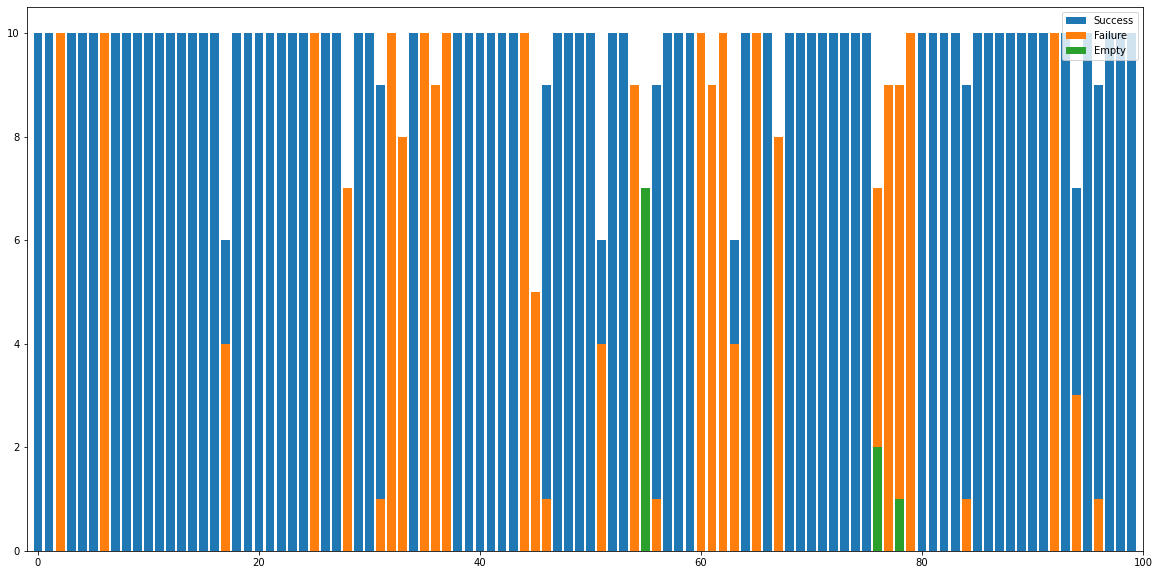

In [3]:
a, b = 0, 100
plt.figure(figsize=(20,10))
plt.bar(np.arange(a, b), success1[a:b], label='Success')
plt.bar(np.arange(a, b), failure1[a:b], label='Failure')
plt.bar(np.arange(a, b), empty1[a:b], label='Empty')
plt.legend()
plt.xlim(a-1, b)
plt.show()

In [4]:
success_rate = np.sum(success1)/(100*2*10 - 320)
print('Success rate: {}%'.format(success_rate*100))

Success rate: 79.94047619047619%


In [5]:
print('Number of fully successful configurations: {}'.format(len(success1[success1 == 10])))
print('Number of fully failed configurations: {}'.format(len(success1[success1 == 0])))

Number of fully successful configurations: 123
Number of fully failed configurations: 53


## Experiment 2

- $N = 10$
- $C \in [0; 100[$
- $M \in \{0; 1\}$
- Global planner config:
    - `UAV_THICKNESS = 0.5`
- Local planner config:
    - Collision distance threshold: $0.2$
    - $k_{ep}=5.2$
    - $k_c=0.05$
    - $k_{dir}=2$
    
The map 1 is not `forest1`. It is the `big_forest` map, but we used it with the configurations of `forest1`. 
That caused a lot of the configurations to be invalid. But the results are still usable.

We implemented a detection system of failure in the global planner, to distinguish global planning failure, invalid maps and unknown failure.
We also added a small algorithm to smooth the initial yaw instructions, before starting the planning algorithm.

**Success rate: 84.70%** (over 1680 valid test cases, after removing the 320 invalid maps)

We obtain better results, thanks to the smoother initial yaw controller.

However the local planner may not be optimal, we observe a lot of unwanted behavior, with sharp turns when the path is close to an obstacle.
The minimization algorithm is not optimal, but the cost function may also not be good enough. Maybe we should reduce the final direction component, and increase the collision cost.

In [6]:
success2, failureLocal2, failureGlobal2, failureMap2, invalid2 = np.load('save2.npy')

In [7]:
print('Number of success: {}'.format(np.sum(success2)))
print('Number of local planner failure: {}'.format(np.sum(failureLocal2)))
print('Number of global planner failure: {}'.format(np.sum(failureGlobal2)))
print('Number of invalid map: {}'.format(np.sum(failureMap2)))
print('Number of unknown failure: {}'.format(np.sum(invalid2)))

print('Number of fully successful configurations: {}'.format(len(success2[success2 == 10])))
print('Number of fully failed configurations: {}'.format(len(success2[success2 == 0])))

print('Success rate: {}%'.format(np.sum(success2)/(100*2*10 - np.sum(failureMap2+failureGlobal2)) * 100))

Number of success: 1423.0
Number of local planner failure: 257.0
Number of global planner failure: 10.0
Number of invalid map: 310.0
Number of unknown failure: 0.0
Number of fully successful configurations: 130
Number of fully failed configurations: 45
Success rate: 84.70238095238095%


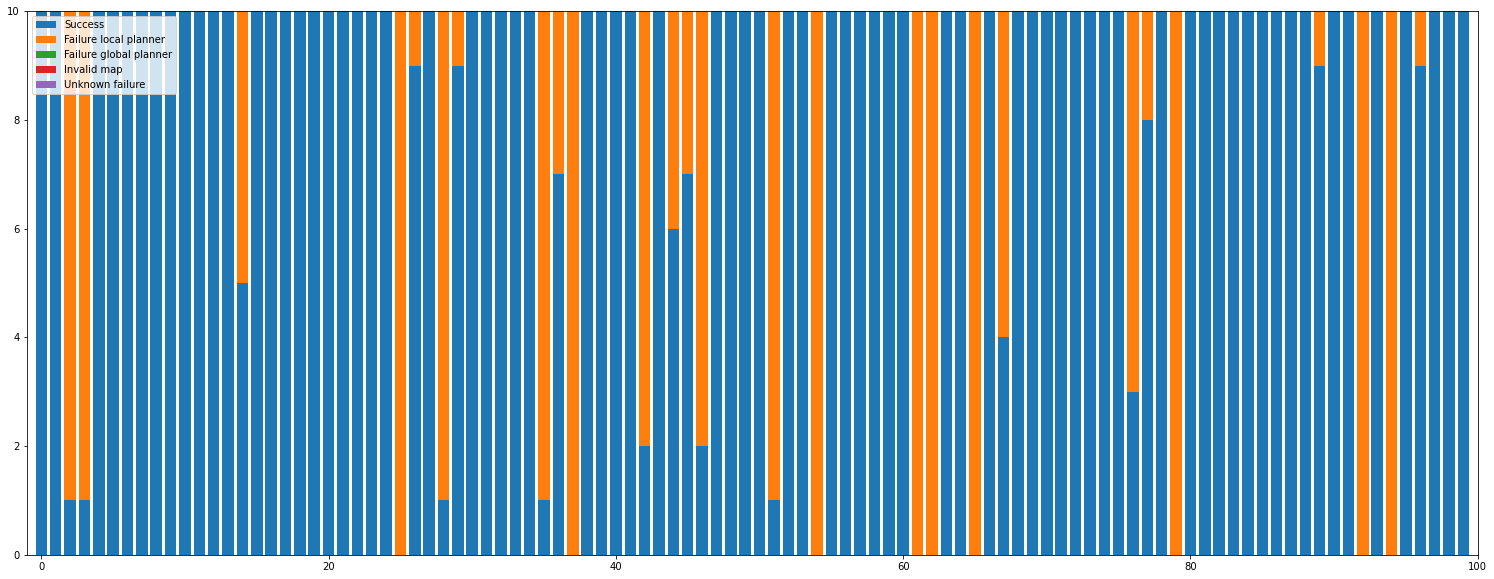

In [8]:
a, b = 0, 100
plt.figure(figsize=(26,10))
plt.bar(np.arange(a, b), success2[a:b], label='Success')
plt.bar(np.arange(a, b), failureLocal2[a:b], label='Failure local planner', bottom=success2[a:b])
plt.bar(np.arange(a, b), failureGlobal2[a:b], label='Failure global planner', bottom=success2[a:b]+failureLocal2[a:b])
plt.bar(np.arange(a, b), failureMap2[a:b], label='Invalid map', bottom=success2[a:b]+failureLocal2[a:b]+failureGlobal2[a:b])
plt.bar(np.arange(a, b), invalid2[a:b], label='Unknown failure', bottom=success2[a:b]+failureLocal2[a:b]+failureGlobal2[a:b]+failureMap2[a:b])
plt.legend()
plt.xlim(a-1, b)
plt.show()

## Experiment 3

- $N = 10$
- $C \in [0; 100[$
- $M \in \{0; 1\}$
- Global planner config:
    - `UAV_THICKNESS = 0.8`
- Local planner config:
    - Collision distance threshold: $0.2$
    - $k_{ep}=5$
    - $k_c=0.1$
    - $k_{dir}=1$
    
The map 1 is not `forest1`. It is the `big_forest` map, but we used it with the configurations of `forest1`. 
That caused a lot of the configurations to be invalid. But the results are still usable.

We slightly improved the tuning of the cost function.

To reduce the number of local planner failures, we tried to make the global planner safer. We increased the threshold distance to consider a point far enough from an obstacle. This had to consequence of making most maps invalid, with the goal or start to close from an obstacle. To improve that, we made a small algorithm to slightly move the goal or start far enough from the obstacles, to be valid. Then we run the algorithm as usual.

Finally, we fixed a small bug with the smooth initial yaw controller, which made negative angles unstable, especially 180° angle.

**Success rate: 90.8%** (over 1000 valid test cases, after removing all the map's 1 cases)

The mistake of using the big forest as the `forest1` map caused most test cases to be invalid here.

On the valid maps though, we see a very strong improvement.

In [9]:
success3, failureLocal3, failureGlobal3, failureMap3, invalid3 = np.load('save3.npy')

In [10]:
print('Number of success: {}'.format(np.sum(success3)))
print('Number of local planner failure: {}'.format(np.sum(failureLocal3)))
print('Number of global planner failure: {}'.format(np.sum(failureGlobal3)))
print('Number of invalid map: {}'.format(np.sum(failureMap3)))
print('Number of unknown failure: {}'.format(np.sum(invalid3)))

print('Number of fully successful configurations: {}'.format(len(success3[success3 == 10])))
print('Number of fully failed configurations: {}'.format(len(success3[success3 == 0])))

print('Success rate: {}%'.format(np.sum(success3)/(np.sum(success3)+np.sum(failureLocal3)+np.sum(failureGlobal3)) * 100))

Number of success: 908.0
Number of local planner failure: 32.0
Number of global planner failure: 60.0
Number of invalid map: 1000.0
Number of unknown failure: 0.0
Number of fully successful configurations: 90
Number of fully failed configurations: 108
Success rate: 90.8%


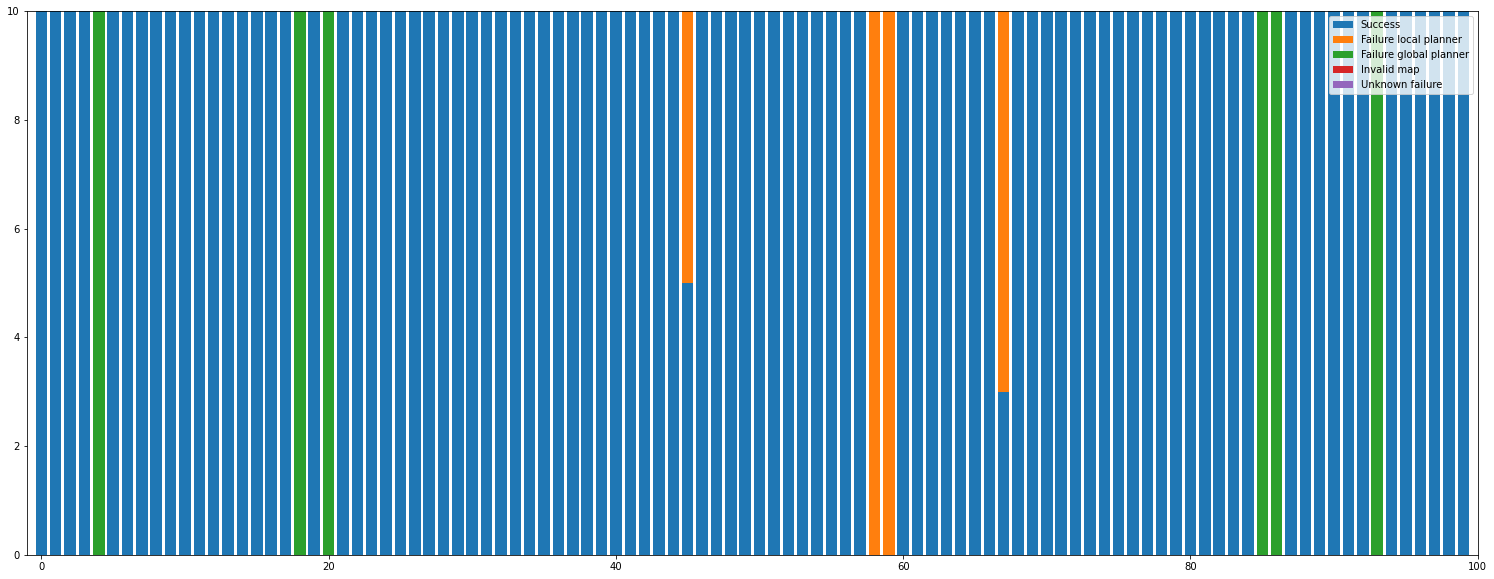

In [11]:
a, b = 0, 100
plt.figure(figsize=(26,10))
plt.bar(np.arange(a, b), success3[a:b], label='Success')
plt.bar(np.arange(a, b), failureLocal3[a:b], label='Failure local planner', bottom=success3[a:b])
plt.bar(np.arange(a, b), failureGlobal3[a:b], label='Failure global planner', bottom=success3[a:b]+failureLocal3[a:b])
plt.bar(np.arange(a, b), failureMap3[a:b], label='Invalid map', bottom=success3[a:b]+failureLocal3[a:b]+failureGlobal3[a:b])
plt.bar(np.arange(a, b), invalid3[a:b], label='Unknown failure', bottom=success3[a:b]+failureLocal3[a:b]+failureGlobal3[a:b]+failureMap3[a:b])
plt.legend()
plt.xlim(a-1, b)
plt.show()

## Experiment 4

We fixed various stuff:
- a bug with the local planner preventing it to exceed the map boundaries (should reduce local planner failure)
- increase safety margins with the global planner (should reduce local planner failure but increase global planner failure)

We also added all the maps from the `forest_gen` repository. We ran the algorithm much longer.
We expect more interesting results.

- $N = 10$
- $C \in [0; 100[$
- $M \in \{0; 1; 2; 3; 4\}$
- Global planner config:
    - `UAV_THICKNESS = 0.8`
- Local planner config:
    - Collision distance threshold: $0.2$
    - $k_{ep}=5$
    - $k_c=0.1$
    - $k_{dir}=1$
    
**Success rate: 96.843%** (over 4340 test cases, after removing all the invalid cases and the global planner failure)

**Success rate: 86.678%** (over 4852 test cases, after removing all the invalid cases, and including global planning failure)

This shows that in order to improve drastically the performances of our algorithm,
we must improve the success rate of our global planning algorithm. Most global failure results
from the goal not being able to be recognized. It is probably a bug that should be easily corrected.

We can also see that most global planning failure are happening in map 4. In map 0, 1, 2 and 3, there is not
much failures. This shows how we must prioritize testing on different maps.

Additionally, we can see that most of the time, the 10 times tests are not strictly necessary to get an understanding of the failure of a configuration. Maybe we can reduce $N$ to $N=7$ or $N=8$.

In [12]:
success4, failureLocal4, failureGlobal4, failureMap4, invalid4 = np.load('save4.npy')

In [13]:
print('Number of success: {}'.format(np.sum(success4)))
print('Number of local planner failure: {}'.format(np.sum(failureLocal4)))
print('Number of global planner failure: {}'.format(np.sum(failureGlobal4)))
print('Number of invalid map: {}'.format(np.sum(failureMap4)))
print('Number of unknown failure: {}'.format(np.sum(invalid4)))

print('Number of fully successful configurations: {}'.format(len(success4[success4 == 10])))
print('Number of fully failed configurations: {}'.format(len(success4[success4 == 0])))

print()
print('Success rate: {:.3f}% (Removing global planning failure)'.format(100 * np.sum(success4)/(np.sum(success4)+np.sum(failureLocal4))))
print('Success rate: {:.3f}% (With all "valid" maps)'.format(100 * np.sum(success4)/(np.sum(success4)+np.sum(failureLocal4)+np.sum(failureGlobal4))))

Number of success: 4203.0
Number of local planner failure: 137.0
Number of global planner failure: 512.0
Number of invalid map: 0.0
Number of unknown failure: 4148.0
Number of fully successful configurations: 408
Number of fully failed configurations: 567

Success rate: 96.843% (Removing global planning failure)
Success rate: 86.624% (With all "valid" maps)


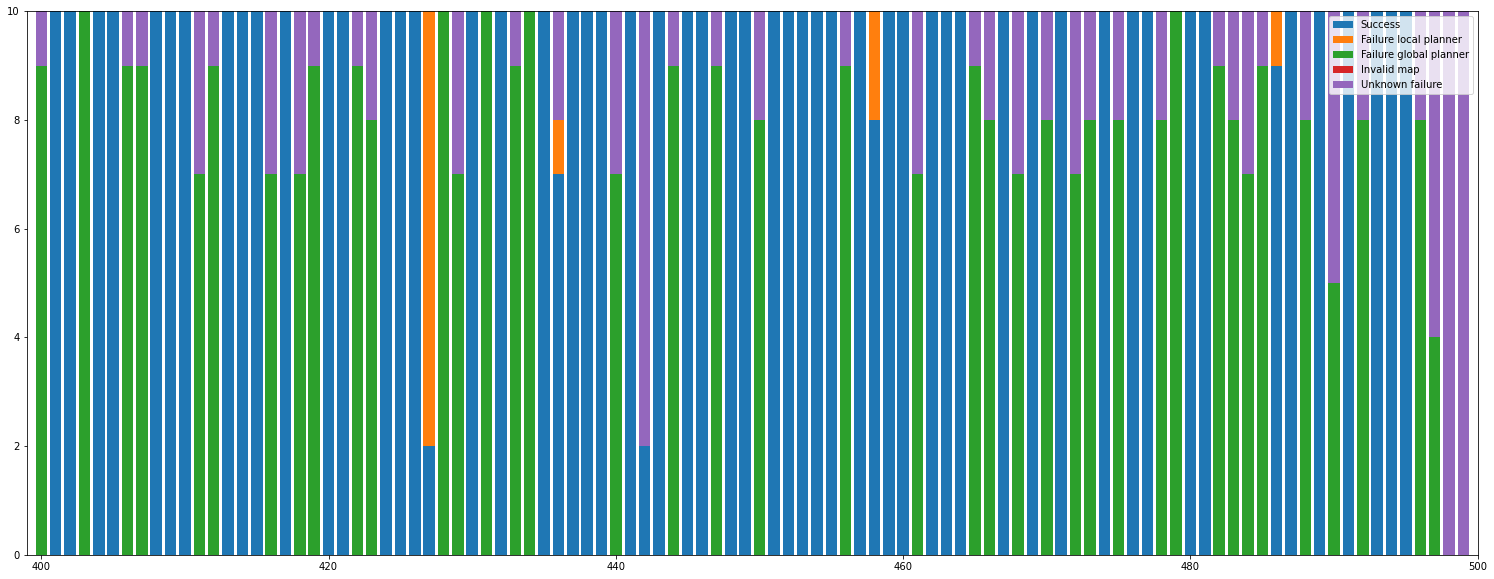

In [14]:
mapId = 4
a, b = mapId*100, (mapId+1)*100
plt.figure(figsize=(26,10))
plt.bar(np.arange(a, b), success4[a:b], label='Success')
plt.bar(np.arange(a, b), failureLocal4[a:b], label='Failure local planner', bottom=success4[a:b])
plt.bar(np.arange(a, b), failureGlobal4[a:b], label='Failure global planner', bottom=success4[a:b]+failureLocal4[a:b])
plt.bar(np.arange(a, b), failureMap4[a:b], label='Invalid map', bottom=success4[a:b]+failureLocal4[a:b]+failureGlobal4[a:b])
plt.bar(np.arange(a, b), invalid4[a:b], label='Unknown failure', bottom=success4[a:b]+failureLocal4[a:b]+failureGlobal4[a:b]+failureMap4[a:b])
plt.legend()
plt.xlim(a-1, b)
plt.show()

## Experiment 5

Fixed a bug in the global planner, where the goal was not using the correct coordinate
to be recognized, which made the graph unlinked to the goal, thus resulting in a global planning failure.
We only ran it on map 4, as it showed the most global planner failure.

- $N = 10$
- $C \in [0; 100[$
- $M \in \{4\}$
- Global planner config:
    - `UAV_THICKNESS = 0.8`
    - `H_COST_WEIGHT = 1.8`
    - `INCREMENT_DISTANCE = .4`
- Local planner config:
    - Collision distance threshold: $0.2$
    - $k_{ep}=5$
    - $k_c=0.1$
    - $k_{dir}=1$

**Success rate: 66.74%** (including global planning failure)

This shows that solving the bug did not help in reducing the low amount of global planner successes. 
We must investigate further to find more problems.

In [15]:
success5, failureLocal5, failureGlobal5, failureMap5, invalid5 = np.load('save5.npy')

In [16]:
print('Number of success: {}'.format(np.sum(success5)))
print('Number of local planner failure: {}'.format(np.sum(failureLocal5)))
print('Number of global planner failure: {}'.format(np.sum(failureGlobal5)))
print('Number of invalid map: {}'.format(np.sum(failureMap5)))
print('Number of unknown failure: {}'.format(np.sum(invalid5)))

print('Number of fully successful configurations: {}'.format(len(success5[success5 == 10])))
print('Number of fully failed configurations: {}'.format(len(success5[success5 == 0])))

print()
print('Success rate: {:.3f}% (Removing global planning failure)'.format(100 * np.sum(success5)/(np.sum(success5)+np.sum(failureLocal5))))
print('Success rate: {:.3f}% (With all "valid" maps)'.format(100 * np.sum(success5)/(np.sum(success5)+np.sum(failureLocal5)+np.sum(failureGlobal5))))

Number of success: 604.0
Number of local planner failure: 4.0
Number of global planner failure: 297.0
Number of invalid map: 0.0
Number of unknown failure: 8095.0
Number of fully successful configurations: 58
Number of fully failed configurations: 939

Success rate: 99.342% (Removing global planning failure)
Success rate: 66.740% (With all "valid" maps)


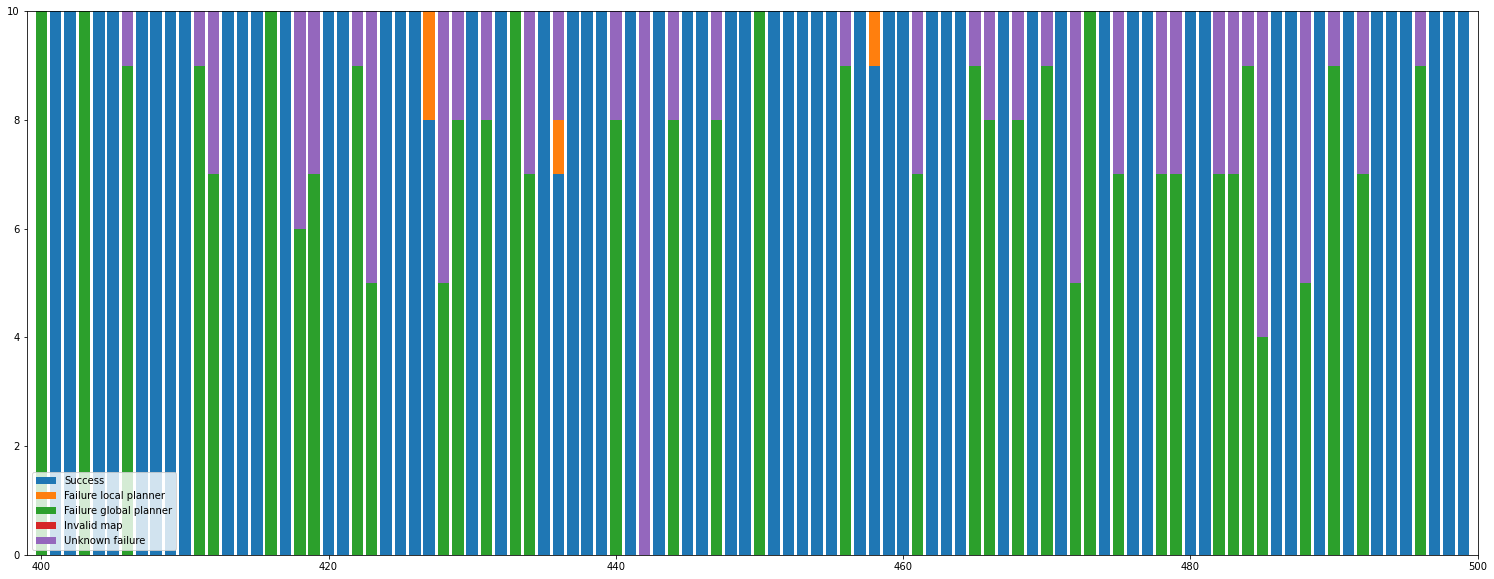

In [17]:
mapId = 4
a, b = mapId*100, (mapId+1)*100
plt.figure(figsize=(26,10))
plt.bar(np.arange(a, b), success5[a:b], label='Success')
plt.bar(np.arange(a, b), failureLocal5[a:b], label='Failure local planner', bottom=success5[a:b])
plt.bar(np.arange(a, b), failureGlobal5[a:b], label='Failure global planner', bottom=success5[a:b]+failureLocal5[a:b])
plt.bar(np.arange(a, b), failureMap5[a:b], label='Invalid map', bottom=success5[a:b]+failureLocal5[a:b]+failureGlobal5[a:b])
plt.bar(np.arange(a, b), invalid5[a:b], label='Unknown failure', bottom=success5[a:b]+failureLocal5[a:b]+failureGlobal5[a:b]+failureMap5[a:b])
plt.legend()
plt.xlim(a-1, b)
plt.show()

In [18]:
mapId = 4
a, b = mapId*100, (mapId+1)*100
print('Success exp #4 on map {}: {}'.format(mapId, np.sum(success4[a:b])))
print('Success exp #5 on map {}: {}'.format(mapId, np.sum(success5[a:b])))

Success exp #4 on map 4: 558.0
Success exp #5 on map 4: 604.0


## Experiment 6

All the global planner failures were mostly due to the map being a big circle of trees, surrounding a large area, where the goal can be.
When the goal is in the center, phi* cannot find a way to insert itself around the trees.

We increased the resolution of the Phi* grid, and tuned some constants, to keep satisfying time performances.
We implement a different $H(x)$ heuristic function, as $H(a,b) = \sqrt{(x_a - x_b)^2 + (y_a - y_b)^2 + ((z_a - z_b) w_z)^2}$.
This should penalizes the algorithm when it is search in the z axis. We know that all of our test cases
won't require to search up or down. So we penalized it quite heavily.

- $N = 10$
- $C \in [0; 100[$
- $M \in \{0; 1; 2; 3; 4; 5; 7; 8; 9\}$
- Global planner config:
    - `UAV_THICKNESS = 0.8`
    - **`H_COST_WEIGHT = 3`**
    - **`INCREMENT_DISTANCE = .2`**
    - **$w_z = 10$**
- Local planner config:
    - Collision distance threshold: $0.2$
    - $k_{ep}=5$
    - $k_c=0.1$
    - $k_{dir}=1$

**Success rate: 94.83%** (including all test cases)

We get very satisfying results. The algorithm performs quite uniformly on almost all maps.

On map 7, we see slightly more local planner failures. The global planner seems to not be able to move through the forest, maybe because the forest is too dense. This may create harder to compute local planning problems, with more local minimums.

On map 9, we have a lot of local planner failures, but also some global planner failures. Some failures are unknown, but they may be identified as global planner failures too.
The map

In [19]:
success6, failureLocal6, failureGlobal6, failureMap6, invalid6 = np.load('save6.npy')

In [41]:
print('Number of success: {}'.format(np.sum(success6)))
print('Number of local planner failure: {}'.format(np.sum(failureLocal6)))
print('Number of global planner failure: {}'.format(np.sum(failureGlobal6)))
print('Number of invalid map: {}'.format(np.sum(failureMap6)))
print('Number of unknown failure: {}'.format(np.sum(invalid6)))

print()
print('Success rate: {:.3f}% (Removing global planning failure)'.format(100 * np.sum(success6)/(np.sum(success6)+np.sum(failureLocal6))))
print('Success rate: {:.3f}% (With all "valid" maps)'.format(100 * np.sum(success6)/(np.sum(success6)+np.sum(failureLocal6)+np.sum(failureGlobal6))))

Number of success: 8515.0
Number of local planner failure: 390.0
Number of global planner failure: 74.0
Number of invalid map: 0.0
Number of unknown failure: 21.0

Success rate: 95.620% (Removing global planning failure)
Success rate: 94.832% (With all "valid" maps)


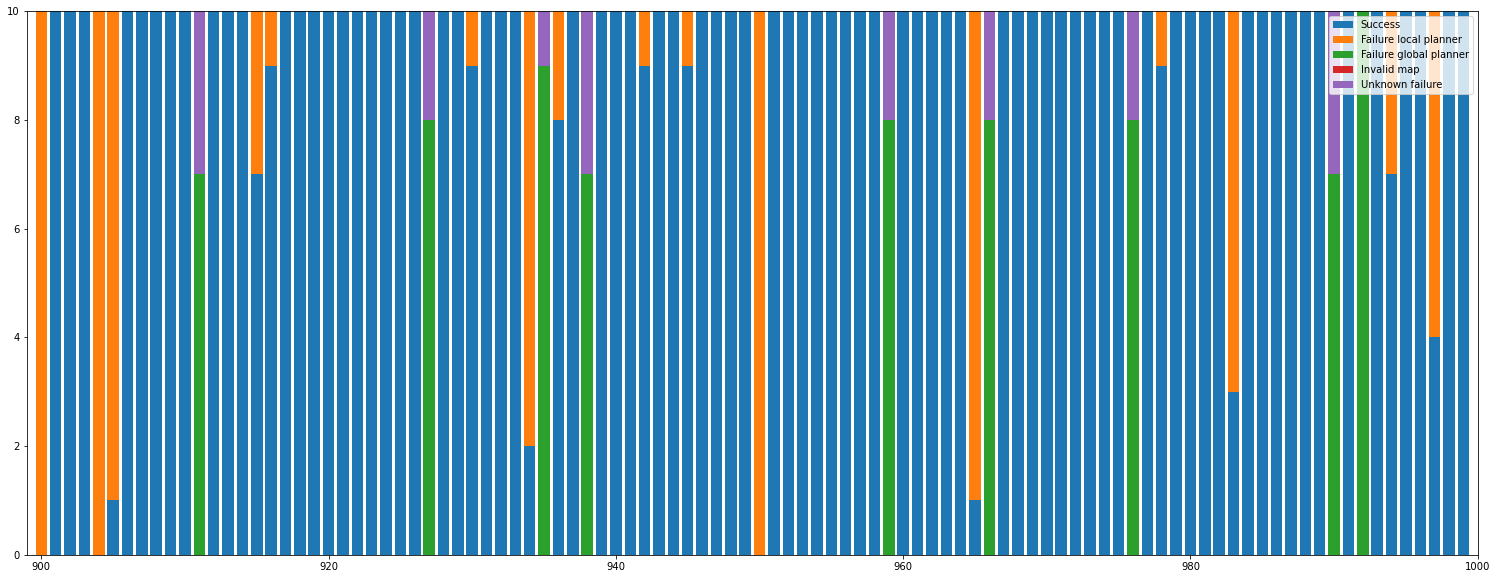

In [39]:
mapId = 9
a, b = mapId*100, (mapId+1)*100
plt.figure(figsize=(26,10))
plt.bar(np.arange(a, b), success6[a:b], label='Success')
plt.bar(np.arange(a, b), failureLocal6[a:b], label='Failure local planner', bottom=success6[a:b])
plt.bar(np.arange(a, b), failureGlobal6[a:b], label='Failure global planner', bottom=success6[a:b]+failureLocal6[a:b])
plt.bar(np.arange(a, b), failureMap6[a:b], label='Invalid map', bottom=success6[a:b]+failureLocal6[a:b]+failureGlobal6[a:b])
plt.bar(np.arange(a, b), invalid6[a:b], label='Unknown failure', bottom=success6[a:b]+failureLocal6[a:b]+failureGlobal6[a:b]+failureMap6[a:b])
plt.legend()
plt.xlim(a-1, b)
plt.show()